# To predict the marks of a student based on the number of study hours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data from remote link
url = 'http://bit.ly/w-data'
s_data = pd.read_csv(url)
print("Data imported successfully.")
s_data.head(10)

Data imported successfully.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


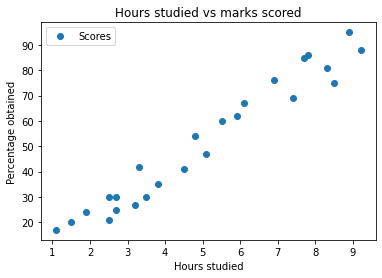

In [5]:
s_data.plot(x='Hours', y='Scores', style='o')
plt.title("Hours studied vs marks scored")
plt.xlabel("Hours studied")
plt.ylabel("Percentage obtained")
plt.show()

# Preparing the data

In [11]:
# To extract the features of the data
# Divide the data into attributes(inputs) and labels("outputs")
x = s_data.iloc[:, : -1].values
y = s_data.iloc[:, 1].values

In [12]:
x, y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Training the algorithm

In [18]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("Training complete")

Training complete


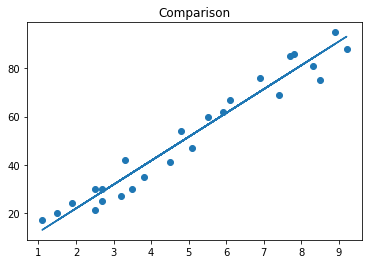

In [19]:
# Plotting the regression line
line = lreg.coef_*x+lreg.intercept_

# Plotting the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.title("Comparison")
plt.show()

# Making predictions

In [20]:
print(X_test)
y_pred = lreg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
score_pred = np.array([9.25])
score_pred = score_pred.reshape(-1, 1)
predict = lreg.predict((score_pred))
print("Number of hours: {}".format(9.25))
print("Percentage obtained: {}".format(predict[0]))

Number of hours: 9.25
Percentage obtained: 93.69173248737538


# Evaluating the model

In [24]:
from sklearn import metrics
print("Mean absolute error: ", metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error:  4.183859899002975
